# 03 – Baseline Modeling (Classification & Regression)

## 1. Objective

In this notebook, we will:

- Load the processed dataset: `data/processed/housing_with_features.csv`.
- Define:
  - Features `X`
  - Classification target: `Good_Investment`
  - Regression target: `Future_Price_5Y`
- Split into train and test sets.
- Train baseline models (Logistic Regression, Random Forest) for:
  - Classification (Good_Investment)
  - Regression (Future_Price_5Y)
- Evaluate models using standard metrics.
- Save the best models to:
  - `models/best_classification_model.pkl`
  - `models/best_regression_model.pkl`


# 2. Imports & configuration

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(".."))

from src.models import (
    split_data_for_modeling,
    build_preprocessor,
    get_classification_models,
    get_regression_models,
    save_model,
    classification_metrics,
    regression_metrics,
)

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("✔ Libraries and model utilities imported")

✔ Libraries and model utilities imported


# 3. Load processed dataset

In [2]:
DATA_PATH = "../data/processed/housing_with_features.csv"

try:
    df = pd.read_csv(DATA_PATH)
    print(f"✔ Processed Data loaded successfully — {df.shape[0]} rows, {df.shape[1]} columns")
    display(df.head())
except FileNotFoundError:
    print("❌ ERROR: Dataset not found. Check file path.")

✔ Processed Data loaded successfully — 250000 rows, 31 columns


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Furnished_Status_Enc,Availability_Status_Enc,Transport_Score,Security_Score,Annual_Growth_Rate,Future_Price_5Y,Investment_Score,Good_Investment
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,2,1,2,0,0.07,691.62,2,0
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,0,0,0,0,0.08,285.66,2,0
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,1,1,0,0,0.04,220.74,3,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,2,1,2,0,0.06,405.10,3,1
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,1,1,0,0,0.03,217.10,2,0



# 4. Split data into train/test and get feature types


In [3]:
(
    X_train,
    X_test,
    y_clf_train,
    y_clf_test,
    y_reg_train,
    y_reg_test,
    numeric_cols,
    categorical_cols,
) = split_data_for_modeling(df)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)
print("\nNumeric features:", numeric_cols)
print("\nCategorical features:", categorical_cols)

Train shape: (200000, 28)
Test shape : (50000, 28)

Numeric features: ['BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Furnished_Status_Enc', 'Availability_Status_Enc', 'Transport_Score', 'Security_Score', 'Annual_Growth_Rate', 'Investment_Score']

Categorical features: ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']


# 5. Build preprocessing pipeline


In [4]:
preprocessor = build_preprocessor(numeric_cols, categorical_cols)
print("✔ Preprocessor created")

✔ Preprocessor created


# 6. Baseline classification models



Training classification model: logistic_regression
Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'roc_auc': 1.0}


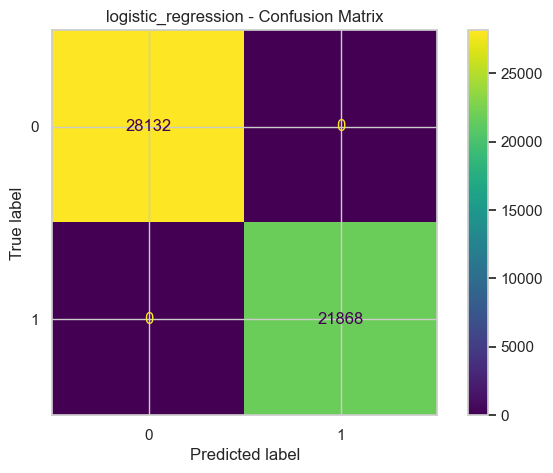


Training classification model: random_forest_classifier
Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'roc_auc': 1.0}


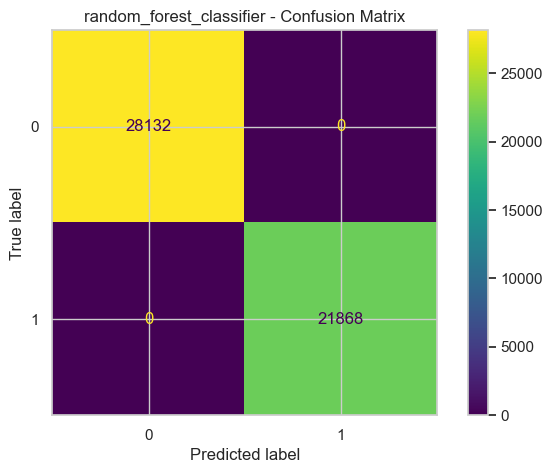


Best classification model: logistic_regression
Best classification metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'roc_auc': 1.0}


In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf_models = get_classification_models(preprocessor)

best_clf_name = None
best_clf_model = None
best_clf_score = -np.inf
best_clf_metrics = None

for name, model in clf_models.items():
    print(f"\nTraining classification model: {name}")
    model.fit(X_train, y_clf_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    metrics = classification_metrics(y_clf_test, y_pred, y_proba)
    print("Metrics:", metrics)

    # Use F1 as main score for choosing best classifier
    if metrics["f1"] > best_clf_score:
        best_clf_score = metrics["f1"]
        best_clf_name = name
        best_clf_model = model
        best_clf_metrics = metrics

    # Confusion matrix plot
    cm = confusion_matrix(y_clf_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

print("\nBest classification model:", best_clf_name)
print("Best classification metrics:", best_clf_metrics)

# 7. Baseline regression models


Using 80000 rows for regression training

Training regression model: linear_regression
Metrics: {'mae': 9.690430048014619, 'rmse': np.float64(12.844592528502243), 'r2': 0.9952602075350406}


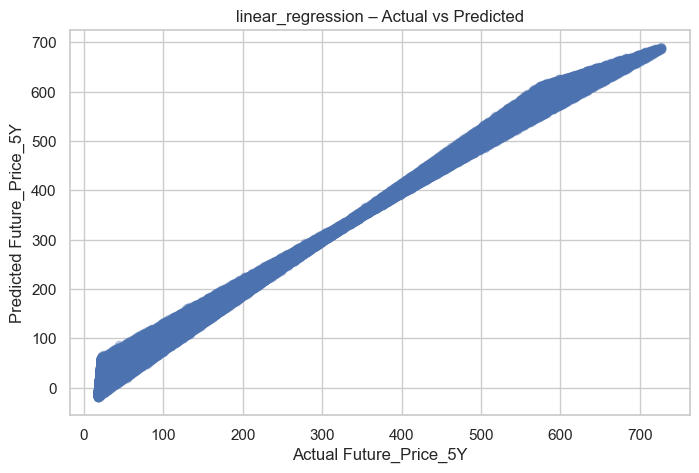


Training regression model: random_forest_regressor
Metrics: {'mae': 0.440817648955995, 'rmse': np.float64(0.6065226321530379), 'r2': 0.9999894315162238}


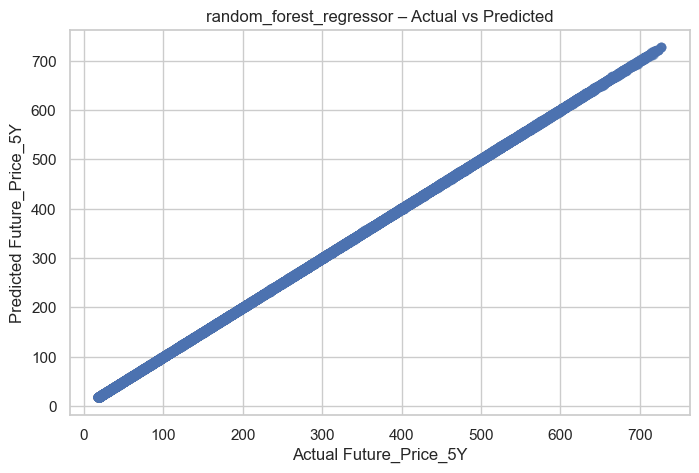


Best regression model: random_forest_regressor
Best regression metrics: {'mae': 0.440817648955995, 'rmse': np.float64(0.6065226321530379), 'r2': 0.9999894315162238}


In [6]:
reg_models = get_regression_models(preprocessor)

best_reg_name = None
best_reg_model = None
best_reg_score = -np.inf  # use R² to choose best
best_reg_metrics = None

X_train_reg = X_train
y_reg_train_reg = y_reg_train

MAX_ROWS = 80000  # cap training rows for heavy models

if len(X_train_reg) > MAX_ROWS:
    X_train_reg = X_train_reg.sample(MAX_ROWS, random_state=42)
    y_reg_train_reg = y_reg_train.loc[X_train_reg.index]

print(f"Using {len(X_train_reg)} rows for regression training")

for name, model in reg_models.items():
    print(f"\nTraining regression model: {name}")
    model.fit(X_train_reg, y_reg_train_reg)

    y_pred = model.predict(X_test)
    metrics = regression_metrics(y_reg_test, y_pred)
    print("Metrics:", metrics)

    # Plot predicted vs actual
    plt.figure()
    plt.scatter(y_reg_test, y_pred, alpha=0.3)
    plt.xlabel("Actual Future_Price_5Y")
    plt.ylabel("Predicted Future_Price_5Y")
    plt.title(f"{name} – Actual vs Predicted")
    plt.show()

    # Choose best model by R²
    if metrics["r2"] > best_reg_score:
        best_reg_score = metrics["r2"]
        best_reg_name = name
        best_reg_model = model
        best_reg_metrics = metrics

print("\nBest regression model:", best_reg_name)
print("Best regression metrics:", best_reg_metrics)


# 8. Save best models

In [7]:
MODELS_DIR = "../models"

best_clf_path = os.path.join(MODELS_DIR, "best_classification_model.pkl")
best_reg_path = os.path.join(MODELS_DIR, "best_regression_model.pkl")

save_model(best_clf_model, best_clf_path)
save_model(best_reg_model, best_reg_path)

print("✔ Saved best classification model to:", best_clf_path)
print("✔ Saved best regression model to    :", best_reg_path)

✔ Saved best classification model to: ../models\best_classification_model.pkl
✔ Saved best regression model to    : ../models\best_regression_model.pkl


## 9. Summary & Next Steps

### Classification (Good_Investment)

- Trained baseline models:
  - Logistic Regression
  - Random Forest Classifier
- Selected best model based on F1-score.
- Saved final model to:
  - `models/best_classification_model.pkl`

### Regression (Future_Price_5Y)

- Trained baseline models:
  - Linear Regression
  - Random Forest Regressor
- Selected best model based on R².
- Saved final model to:
  - `models/best_regression_model.pkl`

### Next

- (Optional) Add hyperparameter tuning for Random Forests.
- Use `src/models/predict.py` and `Streamlit_app.py` to build the Real Estate
  Investment Advisor web app using these trained models.
